In [39]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import ast
from pathlib import Path
import json
import numpy as np

In [37]:
def plot_coordinates(title, list_of_coordinates):
    grid_size = 5  # Define the grid size
    
    # Create the grid with default color value (e.g., 0)
    grid = np.zeros((grid_size, grid_size))
    
    # Set the color value for the selected coordinates (e.g., 1)
    for x, y in list_of_coordinates:
        grid[y][x] = 1  # Note: row and col are switched here
    
    fig, ax = plt.subplots()
    cax = ax.matshow(grid, cmap='plasma', origin='lower')
    
    # Move the x-axis to the bottom
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    
    # Set ticks and labels
    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.set_xticklabels(range(grid_size))
    ax.set_yticklabels(range(grid_size))
    
    # Add red dots on points not selected
    for y in range(grid_size):
        for x in range(grid_size):
            if grid[y][x] == 0:
                ax.plot(x, y, 'ro')  # Plot red dots for unselected points
    
    # Add X on the points that are selected
    for y in range(grid_size):
        for x in range(grid_size):
            if grid[y][x] == 1:
                ax.text(x, y, 'X', va='center', ha='center', color='Black', weight='bold')
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [14]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [309]:
#Make sure the letter is not upside down or backwards otherwise it won't be legible. 

In [310]:
original_prompt = """
A drone us being used to place building blocks on a grid.
You are being asked to come up with the drop off locations for the drone that create a specified design. 
The origin of the grid is [0,0] in the bottom left corner and the last point is [5,5] in the top right.
The X axis goes from [0,0] to [5,0]. The Y axis goes from [0,0] to [0,5].
Make sure none of your points exceed the [5,5] index limit. If they do, fix the design.
Only Integers are allowed.

Please provide the Title and Coordinates in correct JSON format for the Design of the letter "H".
The Coordinates should be given in the specific order you would want them executed. 
Make sure your design makes sense and would be legible.
Make sure the design is legible by thinking step by step as you choose points.
Check the design before confirming it, such as for legibility and index limit of 5. 
If it is wrong, redo the design and then recheck until you find no errors using a step by step approach.
Only return the JSON in the strucuture provided as it needs to be parsed with Python. Do not include any other text or symbols.

Please use the following structure:

{
    "Design": [
        {
            "Title": "Title of Design",
            "Coordinates": [
                [x, y],
                [x, y]
            ],
            "Reasoning": "Your textual reseasoning here"
      }
    ]
}
"""

In [311]:
JSON_Output =""" {
    "Design": [
        {
            "Title": "Letter H",
            "Coordinates": [
                [1, 1],
                [1, 2],
                [1, 3],
                [1, 4],
                [3, 1],
                [3, 2],
                [3, 3],
                [3, 4],
                [1, 3],
                [2, 3],
                [3, 3]
            ],
            "Reasoning": "The coordinates have been selected to form a legible letter 'H' within the 5x5 grid parameters. The vertical lines of the 'H' are created at (1,1) to (1,4) and (3,1) to (3,4), and the horizontal connector is created at y=3 from x=1 to x=3."
        }
    ]
}
"""

In [312]:
desired_xy = "[2,3]"

In [313]:
actual_xy = "[0,2]"

In [314]:
correct_xy = "[1,1], [1,2]"

In [327]:
Test_JSON_prompt = f"""
You were previously provided the following prompt: 
START PROMPT {original_prompt} END PROMPT

Your reponse to this prompt was the following JSON: 
START RESPONSE {JSON_Output} END RESPONSE

While executing the coordinates that were previoulsy provided, blocks were correctly placed at {correct_xy}.
However, an when trying to place a block at {desired_xy}, it was instead placed at {actual_xy}.

This means there are currently blocks at {correct_xy} and {actual_xy}.

You are now tasked with checking the design and recovering it if possible.

If the design is recoverable by continuing with the current plan in a different order, then
provide the coorindates where blocks still need to be placed in the JSON structure provided.

If the design is not recoverable with the current plan, then try to recover it with a new layout that incorparates the already placed blocks. 
A new layout might mean a different orientation of the design, such as turning the design or laterally shifting it, which is allowed if needed. 
Note that any block that has already been placed cannot be removed and therefore must be used in any new designs.
Make sure your design makes if you do a redisgn, then provide the coorindates where blocks still need to be placed at in the JSON structure provided.

Make sure to follow the instructions from the original prompt if needed.

If the design it not not recoverable at all, reply set the Title as "Design is not recoverable." and provide no Coordinates.
"""




In [328]:
print(Test_JSON_prompt)


You were previously provided the following prompt: 
START PROMPT 
A drone us being used to place building blocks on a grid.
You are being asked to come up with the drop off locations for the drone that create a specified design. 
The origin of the grid is [0,0] in the bottom left corner and the last point is [5,5] in the top right.
The X axis goes from [0,0] to [5,0]. The Y axis goes from [0,0] to [0,5].
Make sure none of your points exceed the [5,5] index limit. If they do, fix the design.
Only Integers are allowed.

Please provide the Title and Coordinates in correct JSON format for the Design of the letter "H".
The Coordinates should be given in the specific order you would want them executed. 
Make sure your design makes sense and would be legible.
Make sure the design is legible by thinking step by step as you choose points.
Check the design before confirming it, such as for legibility and index limit of 5. 
If it is wrong, redo the design and then recheck until you find no error

In [329]:
# Define the prompt
prompt = Test_JSON_prompt

# Send the request to OpenAI using the new ChatCompletion method
response = client.chat.completions.create(
    model="gpt-4o",
    response_format = {"type": "json_object"},
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],   
)

In [330]:
print(response)

ChatCompletion(id='chatcmpl-9nuAEcJhO1nkDNxrqLPPE3qdNe3ri', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n    "Design": [\n        {\n            "Title": "Letter H",\n            "Coordinates": [\n                [1, 3],\n                [1, 4],\n                [3, 1],\n                [3, 2],\n                [3, 3],\n                [3, 4],\n                [2, 3]\n            ],\n            "Reasoning": "The existing blocks are at [1,1], [1,2], and [0,2]. To recover the design, we adjust the original orientation so that these blocks can be used effectively. We will keep the \'H\' with one vertical line on (1,y) from y=1 to y=4, and the other at (3,y) from y=1 to y=4. The horizontal connection will be along y=3 from x=1 to x=3."\n        }\n    ]\n}', role='assistant', function_call=None, tool_calls=None))], created=1721680994, model='gpt-4o-2024-05-13', object='chat.completion', service_tier=None, system_fingerprint='fp_40

In [331]:
# Extract the response text
response_text = response.choices[0].message.content
print(response_text)

{
    "Design": [
        {
            "Title": "Letter H",
            "Coordinates": [
                [1, 3],
                [1, 4],
                [3, 1],
                [3, 2],
                [3, 3],
                [3, 4],
                [2, 3]
            ],
            "Reasoning": "The existing blocks are at [1,1], [1,2], and [0,2]. To recover the design, we adjust the original orientation so that these blocks can be used effectively. We will keep the 'H' with one vertical line on (1,y) from y=1 to y=4, and the other at (3,y) from y=1 to y=4. The horizontal connection will be along y=3 from x=1 to x=3."
        }
    ]
}


[[1, 3], [1, 4], [3, 1], [3, 2], [3, 3], [3, 4], [2, 3]]


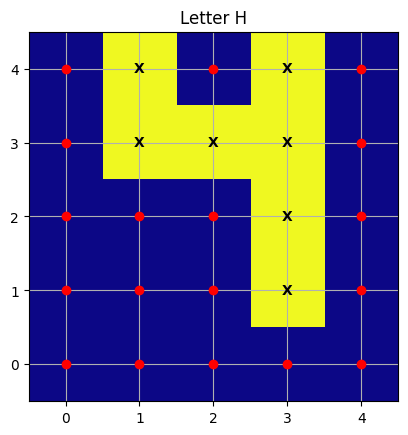

The existing blocks are at [1,1], [1,2], and [0,2]. To recover the design, we adjust the original orientation so that these blocks can be used effectively. We will keep the 'H' with one vertical line on (1,y) from y=1 to y=4, and the other at (3,y) from y=1 to y=4. The horizontal connection will be along y=3 from x=1 to x=3.


In [332]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['Coordinates']
    print(coordinates)
    plot_coordinates(title, coordinates)
    print(design['Reasoning'])

In [191]:
# Parse JSON data
data = json.loads(json_data)

# Extract design title and coordinates
design_title = data["Design"][0]["Title"]
desired_coordinates = data["Design"][0]["Coordinates"]

NameError: name 'json_data' is not defined